#Código Vigas PEII
##### Andrés Felipe Contreras, Melany Daza, Katherin Nohava

In [3]:
#!pip install sv-ttk
#!pip install matplotlib
#!pip install sympy
import matplotlib.pyplot as plt 
import numpy as np 
import sympy as sp
import tkinter as tk
from Funciones import *
from tkinter import ttk
import sv_ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg as plot_widget
import math


###Interface

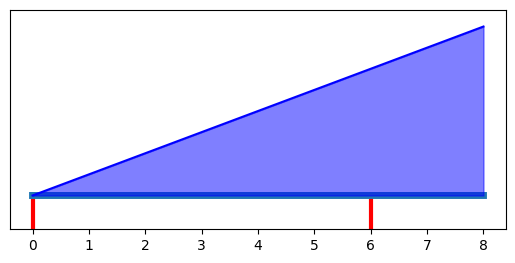

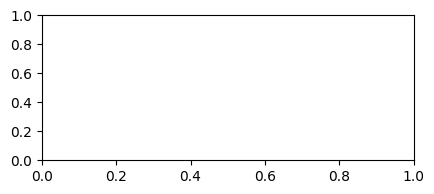

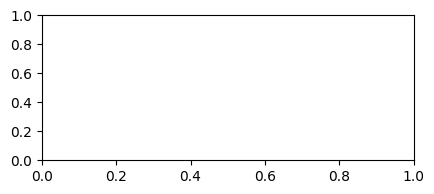

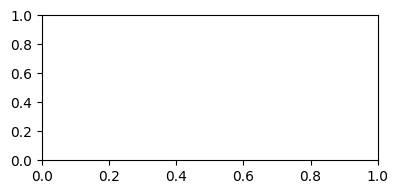

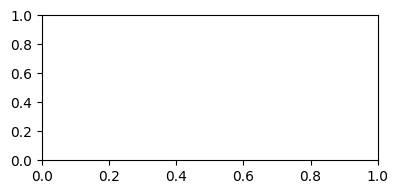

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\andre\AppData\Local\Temp\ipykernel_28560\3562198946.py", line 314, in <lambda>
    calcular = ttk.Button(ui, text="Calcular", command=lambda: calculate_beam(beamgraph, figbeam, sheargraph, figshear, momentgraph,
                                                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\iCloudDrive\Uni\Tercero\Proyecto\Codigo_vigas\Funciones.py", line 430, in calculate_beam
    Factor_o_falla = von_mises_stress()
                     ^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\iCloudDrive\Uni\Tercero\Proyecto\Codigo_vigas\Funciones.py", line 394, in von_mises_stress
    tau_xy1 = beam[4][int(max_moment_pos*scale)]*Q/(I*t)


In [ ]:
ui = tk.Tk()
ui.title("Análisis de vigas")
ui.geometry("1600x850")
sv_ttk.set_theme("Light")


vcmd = (ui.register(validate_numeric_input), '%d', '%P')
vcmd2 = (ui.register(validate_numeric_input_more_decimals), '%d', '%P')


title1 = ttk.Label(ui, text="Propiedades de la viga", font=("Arial", 16, 'bold'))
title1.place(x=50, y=20)   

#Tamaño

# Title label
title_tamaño = ttk.Label(ui, text="Tamaño de la viga (m)", font=("Arial", 12))
title_tamaño.place(relx=0.005, rely=0.05, relwidth=0.3, relheight=0.05)

# Entry for beam size
tam = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
tam.place(relx=0.005, rely=0.09, relwidth=0.05, relheight=0.04)

# Button to accept beam size
tambutton = ttk.Button(ui, text="Aceptar", command=lambda: build_beam(tam, datos))
tambutton.place(relx=0.06, rely=0.09, relwidth=0.05, relheight=0.04)

#Tipo

# Title label for beam type
title_tipo = ttk.Label(ui, text="Tipo de viga", font=("Arial", 12))
title_tipo.place(relx=0.005, rely=0.13, relwidth=0.3, relheight=0.025)

# Combobox for selecting beam type
elegir_tipo = ttk.Combobox(ui, width=4, values=["Cantilever", "Apoyada"])
elegir_tipo.place(relx=0.005, rely=0.16, relwidth=0.05, relheight=0.04)

# Button to accept beam type
tipobutton = ttk.Button(ui, text="Aceptar", command=lambda: type_disable(elegir_tipo, apoyo1, apoyo2, apo1button, apo2button, datos))
tipobutton.place(relx=0.06, rely=0.16, relwidth=0.05, relheight=0.04)

#Apoyos

# Título para la posición de los apoyos
title_apoyos = ttk.Label(ui, text="Posición de los apoyos", font=("Arial", 12))
title_apoyos.place(relx=0.005, rely=0.21, relwidth=0.3, relheight=0.025)

# Etiqueta para Apoyo 1
text_apoyo1 = ttk.Label(ui, text="Apoyo 1", font=("Arial", 10))
text_apoyo1.place(relx=0.015, rely=0.235, relwidth=0.2, relheight=0.025)

# Entrada para Apoyo 1
apoyo1 = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
apoyo1.place(relx=0.005, rely=0.26, relwidth=0.05, relheight=0.04)

# Botón para aceptar Apoyo 1
apo1button = ttk.Button(ui, text="Aceptar", command=lambda: update_supports(apoyo1, 1, datos))
apo1button.place(relx=0.06, rely=0.26, relwidth=0.05, relheight=0.04)

# Etiqueta para Apoyo 2
text_apoyo2 = ttk.Label(ui, text="Apoyo 2", font=("Arial", 10))
text_apoyo2.place(relx=0.015, rely=0.31, relwidth=0.2, relheight=0.025)

# Entrada para Apoyo 2
apoyo2 = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
apoyo2.place(relx=0.005, rely=0.335, relwidth=0.05, relheight=0.04)

# Botón para aceptar Apoyo 2
apo2button = ttk.Button(ui, text="Aceptar", command=lambda: update_supports(apoyo2, 2, datos))
apo2button.place(relx=0.06, rely=0.335, relwidth=0.05, relheight=0.04)

# Título cargas y momentos
title_cargas_momentos = ttk.Label(ui, text="Cargas y momentos", font=("Arial", 16, 'bold'))
title_cargas_momentos.place(relx=0.03, rely=0.44, relwidth=0.3, relheight=0.05)

# Cargas puntuales

# Título para cargas puntuales
title_cargas = ttk.Label(ui, text="Cargas puntuales", font=("Arial", 12))
title_cargas.place(relx=0.005, rely=0.48, relwidth=0.3, relheight=0.025)

# Etiqueta para la posición de la carga
text_poscarga = ttk.Label(ui, text="Posición (m)", font=("Arial", 10))
text_poscarga.place(relx=0.005, rely=0.5, relwidth=0.2, relheight=0.025)

# Entrada para la posición de la carga
cargapuntualpos = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
cargapuntualpos.place(relx=0.005, rely=0.525, relwidth=0.05, relheight=0.04)

# Etiqueta para la magnitud de la carga
text_magnitud = ttk.Label(ui, text="Magnitud (N)", font=("Arial", 10))
text_magnitud.place(relx=0.06, rely=0.5, relwidth=0.2, relheight=0.025)

# Entrada para la magnitud de la carga
cargapuntualmag = ttk.Entry(ui, width=8, textvariable=tk.IntVar())
cargapuntualmag.place(relx=0.06, rely=0.525, relwidth=0.05, relheight=0.04)

# Botón para agregar la carga puntual
tipobutton = ttk.Button(ui, text="Agregar", command=lambda: point_load(cargapuntualpos, cargapuntualmag, datos))
tipobutton.place(relx=0.115, rely=0.525, relwidth=0.05, relheight=0.04)

# Momentos puntuales

# Título para momentos puntuales
title_momentos = ttk.Label(ui, text="Momentos puntuales", font=("Arial", 12))
title_momentos.place(relx=0.005, rely=0.565, relwidth=0.3, relheight=0.025)

# Etiqueta para la posición del momento
text_posmomento = ttk.Label(ui, text="Posición (m)", font=("Arial", 10))
text_posmomento.place(relx=0.005, rely=0.590, relwidth=0.2, relheight=0.025)

# Entrada para la posición del momento
momentopos = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
momentopos.place(relx=0.005, rely=0.615, relwidth=0.05, relheight=0.04)

# Etiqueta para la magnitud del momento
text_magnitud = ttk.Label(ui, text="Magnitud (Nm)", font=("Arial", 10))
text_magnitud.place(relx=0.06, rely=0.590, relwidth=0.2, relheight=0.025)

# Entrada para la magnitud del momento
momentomag = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
momentomag.place(relx=0.06, rely=0.615, relwidth=0.05, relheight=0.04)

# Botón para agregar el momento puntual
tipobutton = ttk.Button(ui, text="Agregar", command=lambda: point_moment(momentopos, momentomag, datos))
tipobutton.place(relx=0.115, rely=0.615, relwidth=0.05, relheight=0.04)

# Cargas distribuidas

# Título para cargas distribuidas
title_distribuidas = ttk.Label(ui, text="Cargas distribuidas", font=("Arial", 12))
title_distribuidas.place(relx=0.005, rely=0.67, relwidth=0.3, relheight=0.025)

# Etiqueta para la expresión matemática
text_expression = ttk.Label(ui, text="Expresión matemática (en términos de x)", font=("Arial", 10))
text_expression.place(relx=0.005, rely=0.695, relwidth=0.4, relheight=0.025)

# Entrada para la expresión matemática
load_expression = ttk.Entry(ui, width=30, textvariable=tk.IntVar())
load_expression.place(relx=0.005, rely=0.72, relwidth=0.15, relheight=0.04)

# Etiqueta para la posición inicial
text_pos_ini = ttk.Label(ui, text="Inicio (m)", font=("Arial", 10))
text_pos_ini.place(relx=0.015, rely=0.77, relwidth=0.2, relheight=0.025)

# Entrada para la posición inicial
dist_ini = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
dist_ini.place(relx=0.005, rely=0.795, relwidth=0.05, relheight=0.04)

# Etiqueta para la posición final
text_pos_fin = ttk.Label(ui, text="Fin (m)", font=("Arial", 10))
text_pos_fin.place(relx=0.07, rely=0.77, relwidth=0.2, relheight=0.025)

# Entrada para la posición final
dist_fin = ttk.Entry(ui, width=8, textvariable=tk.IntVar(), validate='key', validatecommand=vcmd)
dist_fin.place(relx=0.06, rely=0.795, relwidth=0.05, relheight=0.04)

# Botón para agregar la carga distribuida
distbutton = ttk.Button(ui, text="Agregar", command=lambda: distributed_load(dist_ini, dist_fin, load_expression, datos))
distbutton.place(relx=0.115, rely=0.795, relwidth=0.05, relheight=0.04)

# Módulo de Young

# Etiqueta para el Módulo de Young
text_youngs_modulus = ttk.Label(ui, text="Módulo de Young (MPa)", font=("Arial", 12))
text_youngs_modulus.place(relx=0.125, rely=0.06, relwidth=0.3, relheight=0.025)

# Entrada para el Módulo de Young
youngs_modulus = ttk.Entry(ui, width=19, textvariable=tk.DoubleVar(), validate='key', validatecommand=vcmd2)
youngs_modulus.place(relx=0.125, rely=0.09, relwidth=0.1, relheight=0.04)

# Botón para agregar el Módulo de Young
youngs_modulus_button = ttk.Button(ui, text="Agregar", command=lambda: add_youngs_modulus(youngs_modulus,datos))
youngs_modulus_button.place(relx=0.23, rely=0.09, relwidth=0.05, relheight=0.04)

# Momento de inercia

# Etiqueta para el Momento de Inercia
text_moment_of_inertia = ttk.Label(ui, text="Momento de Inercia (mm^4)", font=("Arial", 12))
text_moment_of_inertia.place(relx=0.125, rely=0.14, relwidth=0.3, relheight=0.025)

# Entrada para el Momento de Inercia
moment_of_inertia = ttk.Entry(ui, width=19, textvariable=tk.DoubleVar(), validate='key', validatecommand=vcmd2)
moment_of_inertia.place(relx=0.125, rely=0.17, relwidth=0.1, relheight=0.04)

# Botón para agregar el Momento de Inercia
moment_of_inertia_button = ttk.Button(ui, text="Agregar", command=lambda: add_inertia(moment_of_inertia,datos))
moment_of_inertia_button.place(relx=0.23, rely=0.17, relwidth=0.05, relheight=0.04)

# Sección Transversal

# Título para la Sección Transversal
text_section_title = ttk.Label(ui, text="Sección Transversal", font=("Arial", 12))
text_section_title.place(relx=0.125, rely=0.21, relwidth=0.3, relheight=0.025)

# Distancia al eje neutro

# Etiqueta para la Distancia al eje neutro
text_neutral_axis_distance = ttk.Label(ui, text="Distancia al eje neutro (m)", font=("Arial", 10))
text_neutral_axis_distance.place(relx=0.125, rely=0.24, relwidth=0.3, relheight=0.025)

# Entrada para la Distancia al eje neutro
neutral_axis_distance = ttk.Entry(ui, width=19, textvariable=tk.DoubleVar(), validate='key', validatecommand=vcmd2)
neutral_axis_distance.place(relx=0.125, rely=0.27, relwidth=0.1, relheight=0.04)

# Botón para agregar la Distancia al eje neutro
neutral_axis_distance_button = ttk.Button(ui, text="Aceptar", command=lambda: add_neutral_axis_distance(neutral_axis_distance,datos))
neutral_axis_distance_button.place(relx=0.23, rely=0.27, relwidth=0.05, relheight=0.04)

# Primer momento de área

# Etiqueta para el Primer momento de área
text_first_moment_area = ttk.Label(ui, text="Primer momento de área (mm^3)", font=("Arial", 10))
text_first_moment_area.place(relx=0.125, rely=0.31, relwidth=0.3, relheight=0.025)

# Entrada para el Primer momento de área
first_moment_area = ttk.Entry(ui, width=19, textvariable=tk.DoubleVar(), validate='key', validatecommand=vcmd2)
first_moment_area.place(relx=0.125, rely=0.34, relwidth=0.1, relheight=0.04)

# Botón para agregar el Primer momento de área
first_moment_area_button = ttk.Button(ui, text="Aceptar", command=lambda: add_first_moment_area(first_moment_area,datos))
first_moment_area_button.place(relx=0.23, rely=0.34, relwidth=0.05, relheight=0.04)

# Espesor

# Etiqueta para el Espesor
text_thickness = ttk.Label(ui, text="Espesor (m)", font=("Arial", 10))
text_thickness.place(relx=0.125, rely=0.38, relwidth=0.3, relheight=0.025)

# Entrada para el Espesor
thickness = ttk.Entry(ui, width=19, textvariable=tk.DoubleVar(), validate='key', validatecommand=vcmd2)
thickness.place(relx=0.125, rely=0.41, relwidth=0.1, relheight=0.04)

# Botón para agregar el Espesor
thickness_button = ttk.Button(ui, text="Aceptar", command=lambda: add_thickness(thickness,datos))
thickness_button.place(relx=0.23, rely=0.41, relwidth=0.05, relheight=0.04)

# Sy

# Etiqueta para Sy
text_sy = ttk.Label(ui, text="Sy (MPa)", font=("Arial", 10))
text_sy.place(relx=0.005, rely=0.38, relwidth=0.1, relheight=0.025)

# Entrada para Sy
sy_entry = ttk.Entry(ui, width=8, textvariable=tk.DoubleVar(), validate='key', validatecommand=vcmd2)
sy_entry.place(relx=0.005, rely=0.41, relwidth=0.05, relheight=0.04)

# Botón para agregar Sy
sy_button = ttk.Button(ui, text="Aceptar", command=lambda: add_yield_strength(sy_entry,datos))
sy_button.place(relx=0.06, rely=0.41, relwidth=0.05, relheight=0.04)


# Datos

# Título para la lista de datos

title_cargas_momentos = ttk.Label(ui, text="Lista de datos", font=("Arial", 16, 'bold'))
title_cargas_momentos.place(relx=0.22, rely=0.45, relwidth=0.3, relheight=0.03)

# Scrollbar para la lista de datos
scrollbar = tk.Scrollbar(ui)
scrollbar.place(relx=0.35, rely=0.48, relheight=0.35)

# Listbox para mostrar los datos
datos = tk.Listbox(ui, yscrollcommand=scrollbar.set, font=("Arial", 12))
datos.place(relx=0.17, rely=0.48, relwidth=0.18, relheight=0.35)

# Configuración del scrollbar para la lista de datos
scrollbar.config(command=datos.yview)


# Gráficas

# Dibujo

figbeam, ax = plt.subplots(figsize=(5, 2))
figbeam.subplots_adjust(bottom=0.2)
beamgraph = plot_widget(figbeam, master=ui)
beamgraph.get_tk_widget().place(relx=0.47, rely=0.02, relwidth=0.4, relheight=0.38)

# Cortantes

figshear, ax = plt.subplots(figsize=(5, 2))
figshear.subplots_adjust(bottom=0.2)
sheargraph = plot_widget(figshear, master=ui)
sheargraph.get_tk_widget().place(relx=0.37, rely=0.42, relwidth=0.3, relheight=0.25)

# Momentos

figmoment, ax = plt.subplots(figsize=(5, 2))
figmoment.subplots_adjust(bottom=0.2)
momentgraph = plot_widget(figmoment, master=ui)
momentgraph.get_tk_widget().place(relx=0.37, rely=0.68, relwidth=0.3, relheight=0.25)

# Pendientes

figslope, ax = plt.subplots(figsize=(5, 2))
figslope.subplots_adjust(bottom=0.2)
figslope.subplots_adjust(left=0.2)
slopegraph = plot_widget(figslope, master=ui)
slopegraph.get_tk_widget().place(relx=0.69, rely=0.42, relwidth=0.3, relheight=0.25)

# Deflexiones

figdeflection, ax = plt.subplots(figsize=(5, 2))
figdeflection.subplots_adjust(bottom=0.2)
figdeflection.subplots_adjust(left=0.2)
deflectiongraph = plot_widget(figdeflection, master=ui)
deflectiongraph.get_tk_widget().place(relx=0.69, rely=0.68, relwidth=0.3, relheight=0.25)

# Calcular

# Botón para calcular
calcular = ttk.Button(ui, text="Calcular", command=lambda: calculate_beam(beamgraph, figbeam, sheargraph, figshear, momentgraph,
figmoment, slopegraph, figslope, deflectiongraph, figdeflection, resultados))
calcular.place(relx=0.01, rely=0.94, relwidth=0.1, relheight=0.05)

# Reset

# Lista de entradas y figuras
entries = [tam, elegir_tipo, apoyo1, apoyo2, cargapuntualpos, cargapuntualmag, momentopos,
 momentomag, load_expression, dist_ini, dist_fin, youngs_modulus, moment_of_inertia, neutral_axis_distance,
 first_moment_area, thickness, sy_entry]
figures = [figbeam, figshear, figmoment, figslope, figdeflection]

# Botón para resetear
reset = ttk.Button(ui, text="Reset", command=lambda: reset_all(entries, figures))
reset.place(relx=0.12, rely=0.94, relwidth=0.1, relheight=0.05)

#Resultados

resultados = ttk.Label(ui, text="", font=("Arial", 16, 'bold'))
resultados.place(relx=0.12, rely=0.85, relwidth=0.3, relheight=0.05)

ui.mainloop()
 